## Importação de bibliotecas

In [2]:
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('ticks')

## Leitura do Dataset

In [3]:
colunas = ['regiao','uf','secao','subclasse','saldomovimentacao','cbo2002ocupacao','categoria','graudeinstrucao','idade','racacor','sexo','tipomovimentacao','tipodedeficiencia','salario','indicadoraprendiz']
df = pd.read_csv(r'C:\Users\Pichau\Documents\Fatec\3Semestre\Estrutura_de_dados\CAGED\CAGEDLIGTH\CAGEDLIGTH.csv', encoding = 'UTF-8', delimiter=";", usecols= colunas)

In [ ]:
#caso o data frame seja lido em iso-8859-1
'''
df = df.rename(columns = {'competÃªncia': 'competência', 
'regiÃ£o': 'região',
'municÃ­pio': 'município',
'seÃ§Ã£o': 'seção',
'saldomovimentaÃ§Ã£o': 'saldomovimentação',
'cbo2002ocupaÃ§Ã£o' : 'cbo2002ocupação',
'graudeinstruÃ§Ã£o': 'graudeinstrução',
'raÃ§acor': 'raçacor',
'tipomovimentaÃ§Ã£o': 'tipomovimentação',
'tipodedeficiÃªncia': 'tipodedeficiência',
'salÃ¡rio': 'salário'}, inplace = False)
'''

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000001 entries, 0 to 3000000
Data columns (total 15 columns):
 #   Column             Dtype  
---  ------             -----  
 0   regiao             float64
 1   uf                 float64
 2   secao              object 
 3   subclasse          float64
 4   saldomovimentacao  float64
 5   cbo2002ocupacao    float64
 6   categoria          float64
 7   graudeinstrucao    float64
 8   idade              float64
 9   racacor            float64
 10  sexo               float64
 11  tipomovimentacao   float64
 12  tipodedeficiencia  float64
 13  salario            float64
 14  indicadoraprendiz  float64
dtypes: float64(14), object(1)
memory usage: 343.3+ MB


In [5]:
df['sexo']

0          3.0
1          3.0
2          1.0
3          3.0
4          1.0
          ... 
2999996    1.0
2999997    3.0
2999998    1.0
2999999    3.0
3000000    NaN
Name: sexo, Length: 3000001, dtype: float64

## Data cleaning

In [6]:
df.isnull().sum()

regiao                1
uf                    1
secao                 1
subclasse             1
saldomovimentacao     1
cbo2002ocupacao       1
categoria             1
graudeinstrucao       1
idade                 2
racacor               1
sexo                  1
tipomovimentacao      1
tipodedeficiencia     1
salario              25
indicadoraprendiz     1
dtype: int64

### Como poucos valores estão nulos, vamos excluir estes registros, pois acreditos que não vai influenciar na análise

In [7]:
df = df.dropna()

In [8]:
df['salario']=df['salario'].apply(lambda x :  str(x).replace(',','.'))
df['salario']=df['salario'].apply(lambda x :  str(x).replace('nan','0'))
df['salario']=pd.to_numeric(df['salario'], downcast="float")

In [9]:
df['admitidos/desligados'] = df['tipomovimentacao'].apply(lambda x: "Admitido" if x==10 or x==20 or x==25 or x==35 or x==70 else "Desligado")

In [10]:
Raca = {1: 'BRANCA',2: 'PRETA',3: 'PARDA', 4: 'AMARELA',5 : 'INDIGENA',6:'NÃO INFORMADA',  9: 'NAO IDENTIFICADO'}
Sexo = {1: 'MASCULINO',3 :'FEMININO', 9: 'NAO IDENTIFICADO'}
AdmDem = {1: 'ADMISSÃO', 2: 'DESLIGAMENTO'}
TipoMovDesagregado = {
10:'Admissão por Primeiro Emprego',
20:'Admissão por Reemprego', 
25:'Admissão por contrato trabalho prazo determinado',
31:'Desligamento por Demissão sem Justa Causa', 
32:'Desligamento por Demissão com Justa Causa', 
33:'Culpa Recíproca',
35:'Admissão por Reintegraçao', 
40:'Desligamento a Pedido',
43:'Término contrato trabalho prazo determinado',
45:'Desligamento por Término de Contrato',
50:'Desligamento por Aposentadoria', 
60:'Desligamento por morte',
70:'Admissão por Transferência', 
80:'Desligamento por Transferência', 
90:'Desliamento por Acordo Empregado e Empregador',
98:'Desligamento de Tipo Ignorado',
99:'Não Identificado'}

In [11]:
df['racacor'] = df['racacor'].map(Raca)
df['sexo'] = df['sexo'].map(Sexo)
df['tipomovimentacao'] = df['tipomovimentacao'].map(TipoMovDesagregado)

In [12]:
def categorizarClasseSocial(x):
    #try:
        #x=float(x)

        if x<2200:
            return 'E'
        elif x<4400:
            return 'D'
        elif x<11000:
            return 'C'
        elif x<22000:
            return 'B'
        else:
            return 'A'

#    except:
 #       print("caca: "+x)

In [13]:
df['classe social'] = df['salario'].apply(lambda x: categorizarClasseSocial(x))

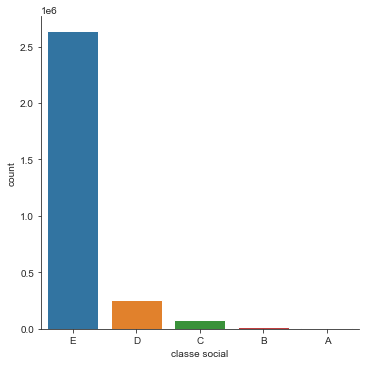

In [14]:
sns.catplot(x="classe social", kind="count", data=df)

In [15]:
def categorizarFaixaEtaria(x):
        if x<20:
            return "Adolescência"
        elif x<26:
            return "Pós-adolescência"
        elif x<40:
            return "Adultidade"
        elif x<65:
            return "Meia-idade"
        elif x<80:
            return "Terceira idade"
        else:
            return "Quarta Idade"

In [16]:
df['faixa Etária'] = df['idade'].apply(lambda x: categorizarFaixaEtaria(x))

### Criar coluna admitidos/desligados apartir dos dados de tipomovimentação

### Calcular total admitido e total desligado

In [17]:
total = df['admitidos/desligados'].count()

### Cria um array só com admitidos

In [18]:
totalAdmitidoArray = df[df['admitidos/desligados'] == "Admitido"]
totalAdmitido = totalAdmitidoArray['admitidos/desligados'].count()

### Cria um array só com desligados

In [19]:
totalDesligadoArray = df[df['admitidos/desligados'] == "Desligado"]
totalDesligado = total - totalAdmitido

# Tópico 1 - Qual foi o índice de pessoas empregadas e desempregadas em certo período, categorizadas por:
    - Gênero 
    - Classe social 
    - Faixa Etária 
    - Nível de escolaridade 
    - Setores (Agronegócio, Indústria, Comércio, etc...) 

# Começa a calcular os items pedidos

## Indice sexo

### Admitidos

In [20]:
TotalAdmitidoFem = (totalAdmitidoArray[totalAdmitidoArray['sexo']=='FEMININO'])['admitidos/desligados'].count()
TotalAdmitidoMasc = totalAdmitido - TotalAdmitidoFem
porcentagemAdmitidoFem = ((TotalAdmitidoFem/totalAdmitido)*100).astype(int)
porcentagemAdmitidoMasc = 100-porcentagemAdmitidoFem
f'Porcentagem Admitido feminino: {porcentagemAdmitidoFem}%  ||  Porcentagem Admitido Masculino:  {porcentagemAdmitidoMasc}%'

'Porcentagem Admitido feminino: 36%  ||  Porcentagem Admitido Masculino:  64%'

In [21]:
#sns.catplot(x="sexo", y="TotalAdmitidoFemi",  palette="ch:.25",kind="bar", data=df)

### Desligados

In [22]:
TotalDesligadoFem = (totalDesligadoArray[totalDesligadoArray['sexo']=='FEMININO'])['admitidos/desligados'].count()
TotalDesligadoMasc = totalDesligado - TotalDesligadoFem
porcentagemDesligadoFem = ((TotalDesligadoFem/totalDesligado)*100).astype(int)
porcentagemDesligadoMasc = 100-porcentagemDesligadoFem
f'Porcentagem Desligado feminino: {porcentagemDesligadoFem}%  ||  Porcentagem Desligado Masculino: {porcentagemDesligadoMasc}%'

'Porcentagem Desligado feminino: 38%  ||  Porcentagem Desligado Masculino: 62%'

## Indice Classe social

In [23]:
classes=['A','B','C','D','E']

### Admitidos

In [24]:
for x in classes: 
    totalAdmitidoClasse = (totalAdmitidoArray[totalAdmitidoArray['classe social']==x])['admitidos/desligados'].count()
    porcentagemAdmitido = ((totalAdmitidoClasse/totalAdmitido)*100).astype(int)
    print(f'Porcentagem Admitidos classe {x}: {porcentagemAdmitido}%')

Porcentagem Admitidos classe A: 0%
Porcentagem Admitidos classe B: 0%
Porcentagem Admitidos classe C: 2%
Porcentagem Admitidos classe D: 8%
Porcentagem Admitidos classe E: 88%


### Desligados

In [25]:
for x in classes: 
    totalDesligadoClasse = (totalDesligadoArray[totalDesligadoArray['classe social']==x])['admitidos/desligados'].count()
    porcentagemDesligado = ((totalDesligadoClasse/totalDesligado)*100).astype(int)
    print(f'Porcentagem Desligado classe {x}: {porcentagemDesligado}%')

Porcentagem Desligado classe A: 0%
Porcentagem Desligado classe B: 0%
Porcentagem Desligado classe C: 2%
Porcentagem Desligado classe D: 9%
Porcentagem Desligado classe E: 87%


## Indice faixa etaria

### Classificação faixa etaria
    15 a 20 anos: Adolescência
    20 a 26 anos: Pós-adolescência
    26 a 40 anos: Adultidade
    40 a 65 anos: Meia-idade
    65 a 80 anos: Terceira idade
    mais que 80 anos: Quarta Idade

In [26]:
faixaEtarias = {
    "Adolescência":"15 a 20 anos",
    "Pós-adolescência":"20 a 26 anos",
    "Adultidade":"26 a 40 anos",
    "Meia-idade":"40 a 65 anos",
    "Terceira idade":"65 a 80 anos",
    "Quarta Idade":"mais que 80 anos"
    }

### Admitidos

In [27]:
for x,y in faixaEtarias.items():
    totalAdmitidoFaixaEtaria = (totalAdmitidoArray[totalAdmitidoArray['faixa Etária']==x])['admitidos/desligados'].count()
    porcentagemAdmitido = ((totalAdmitidoFaixaEtaria/totalAdmitido)*100).astype(int)
    print(f'Porcentagem Admitidos {x} ({y}): {porcentagemAdmitido}%')

Porcentagem Admitidos Adolescência (15 a 20 anos): 11%
Porcentagem Admitidos Pós-adolescência (20 a 26 anos): 25%
Porcentagem Admitidos Adultidade (26 a 40 anos): 42%
Porcentagem Admitidos Meia-idade (40 a 65 anos): 21%
Porcentagem Admitidos Terceira idade (65 a 80 anos): 0%
Porcentagem Admitidos Quarta Idade (mais que 80 anos): 0%


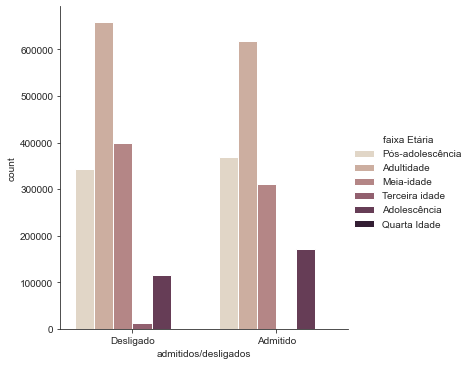

In [28]:
sns.catplot(x="admitidos/desligados",hue="faixa Etária", kind="count", palette="ch:.25", data=df)

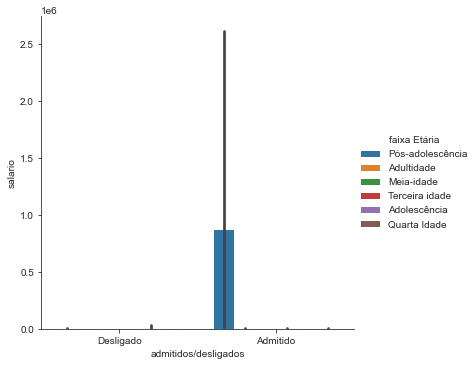

In [29]:
sns.catplot(x="admitidos/desligados", y="salario", hue="faixa Etária", kind="bar", data=df)

### Desligados

In [30]:
for x,y in faixaEtarias.items():
    totalDesligadoFaixaEtaria = (totalDesligadoArray[totalDesligadoArray['faixa Etária']==x])['admitidos/desligados'].count()
    porcentagemDesligado = ((totalDesligadoFaixaEtaria/totalDesligado)*100).astype(int)
    print(f'Porcentagem Desligado {x} ({y}): {porcentagemDesligado}%')

Porcentagem Desligado Adolescência (15 a 20 anos): 7%
Porcentagem Desligado Pós-adolescência (20 a 26 anos): 22%
Porcentagem Desligado Adultidade (26 a 40 anos): 43%
Porcentagem Desligado Meia-idade (40 a 65 anos): 26%
Porcentagem Desligado Terceira idade (65 a 80 anos): 0%
Porcentagem Desligado Quarta Idade (mais que 80 anos): 0%


## Indice Grau Instrução

In [31]:
grauInstrução = {
    1:"Analfabeto",
    2:"Até 5ª Incompleto",
    3:"5ª Completo Fundamental",
    4:"6ª a 9ª Fundamental",
    5:"Fundamental Completo",
    6:"Médio Incompleto",
    7:"Médio Completo",
    8:"Superior Incompleto",
    9:"Superior Completo",
    10:"Mestrado",
    11:"Doutorado",
    80:"Pós-Graduação completa",
    99:"Não Identificado"
}

### Admitidos

In [32]:
for x,y in grauInstrução.items():
    totalAdmitidoGrauInstrução = (totalAdmitidoArray[totalAdmitidoArray['graudeinstrucao']==x])['admitidos/desligados'].count()
    porcentagemAdmitido = ((totalAdmitidoGrauInstrução/totalAdmitido)*100).astype(int)
    print(f'Porcentagem Admitidos {y}: {porcentagemAdmitido}%')

Porcentagem Admitidos Analfabeto: 0%
Porcentagem Admitidos Até 5ª Incompleto: 2%
Porcentagem Admitidos 5ª Completo Fundamental: 1%
Porcentagem Admitidos 6ª a 9ª Fundamental: 4%
Porcentagem Admitidos Fundamental Completo: 7%
Porcentagem Admitidos Médio Incompleto: 7%
Porcentagem Admitidos Médio Completo: 61%
Porcentagem Admitidos Superior Incompleto: 4%
Porcentagem Admitidos Superior Completo: 8%
Porcentagem Admitidos Mestrado: 0%
Porcentagem Admitidos Doutorado: 0%
Porcentagem Admitidos Pós-Graduação completa: 0%
Porcentagem Admitidos Não Identificado: 0%


### Desligados

In [33]:
for x,y in grauInstrução.items():
    totalDesligadoGrauInstrução = (totalDesligadoArray[totalDesligadoArray['graudeinstrucao']==x])['admitidos/desligados'].count()
    porcentagemDesligado = ((totalDesligadoGrauInstrução/totalDesligado)*100).astype(int)
    print(f'Porcentagem Desligado {y}: {porcentagemDesligado}%')

Porcentagem Desligado Analfabeto: 0%
Porcentagem Desligado Até 5ª Incompleto: 2%
Porcentagem Desligado 5ª Completo Fundamental: 2%
Porcentagem Desligado 6ª a 9ª Fundamental: 5%
Porcentagem Desligado Fundamental Completo: 8%
Porcentagem Desligado Médio Incompleto: 8%
Porcentagem Desligado Médio Completo: 58%
Porcentagem Desligado Superior Incompleto: 3%
Porcentagem Desligado Superior Completo: 8%
Porcentagem Desligado Mestrado: 0%
Porcentagem Desligado Doutorado: 0%
Porcentagem Desligado Pós-Graduação completa: 0%
Porcentagem Desligado Não Identificado: 0%


In [34]:
df['graudeinstrucao'] = df['graudeinstrucao'].map(grauInstrução)

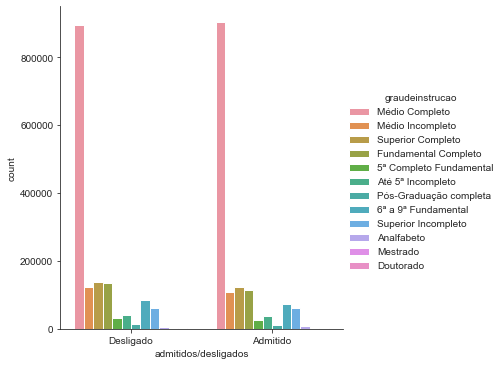

In [35]:
sns.catplot(x="admitidos/desligados",hue="graudeinstrucao", kind="count", data=df)

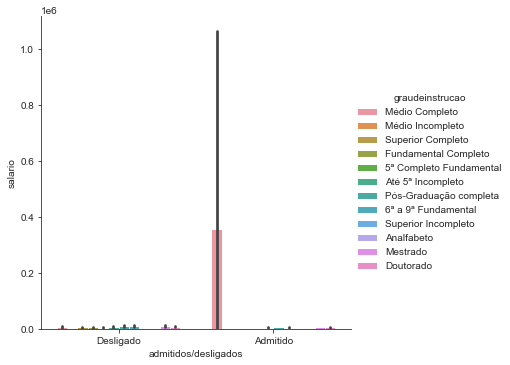

In [36]:
sns.catplot(x="admitidos/desligados", y="salario", hue="graudeinstrucao", kind="bar", data=df)

## Indice Setores

In [37]:
setores ={
    "A":"Agricultura, Pecuária, Produção Florestal, Pesca e AqÜIcultura",
    "B":"Indústrias Extrativas",
    "C":"Indústrias de Transformação",
    "D":"Eletricidade e Gás",
    "E":"Água, Esgoto, Atividades de Gestão de Resíduos e Descontaminação",
    "F":"Construção",
    "G":"Comércio, Reparação de Veículos Automotores e Motocicletas",
    "H":"Transporte, Armazenagem e Correio",
    "I":"Alojamento e Alimentação",
    "J":"Informação e Comunicação",
    "K":"Atividades Financeiras, de Seguros e Serviços Relacionados",
    "L":"Atividades Imobiliárias",
    "M":"Atividades Profissionais, Científicas e Técnicas",
    "N":"Atividades Administrativas e Serviços Complementares",
    "O":"Administração Pública, Defesa e Seguridade Social",
    "P":"Educação",
    "Q":"Saúde Humana e Serviços Sociais",
    "R":"Artes, Cultura, Esporte e Recreação",
    "S":"Outras Atividades de Serviços",
    "T":"Serviços Domésticos",
    "U":"Organismos Internacionais e Outras Instituições Extraterritoriais",
    "Z":"Não identificado"
}

In [38]:
df['secao'].sample(10)

680901     Q
414416     C
1628301    H
2897037    P
2324315    G
1602503    C
1625158    F
209700     C
2278879    F
824570     E
Name: secao, dtype: object

### Admitidos

In [39]:
df['secao']= df['secao'].map(setores)

<AxesSubplot:xlabel='count', ylabel='secao'>

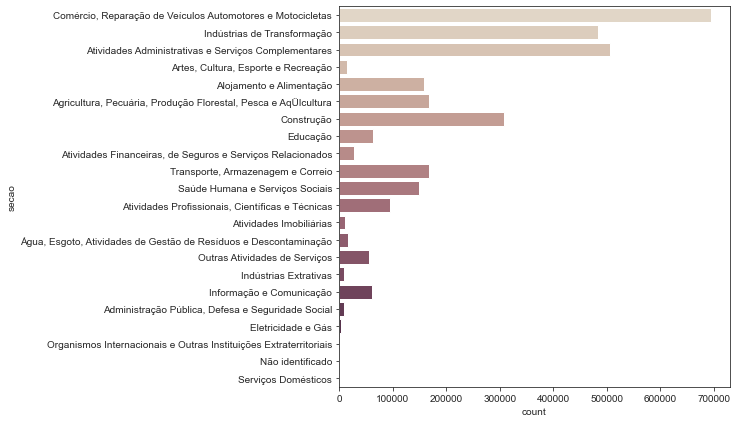

In [40]:
ax = plt.subplots(figsize=(7, 7))
sns.countplot(y="secao", data=df, palette="ch:.25")

In [140]:
Admitidodosetor = []

for x,y in setores.items():
    totalAdmitidoSetores = (totalAdmitidoArray[totalAdmitidoArray['secao']==x])['admitidos/desligados'].count()
    porcentagemAdmitido = ((totalAdmitidoSetores/totalAdmitido)*100).astype(int)
    Admitidodosetor.append(('Porcentagem Admitidos do setor: ' + str(y) +': ' + str(porcentagemAdmitido)+'%'))
cont=0
Admitidodosetor.sort()
for motivo in Admitidodosetor:
    print(Admitidodosetor[cont])
    cont= cont + 1

Porcentagem Admitidos do setor: Administração Pública, Defesa e Seguridade Social: 0%
Porcentagem Admitidos do setor: Agricultura, Pecuária, Produção Florestal, Pesca e AqÜIcultura: 5%
Porcentagem Admitidos do setor: Alojamento e Alimentação: 3%
Porcentagem Admitidos do setor: Artes, Cultura, Esporte e Recreação: 0%
Porcentagem Admitidos do setor: Atividades Administrativas e Serviços Complementares: 17%
Porcentagem Admitidos do setor: Atividades Financeiras, de Seguros e Serviços Relacionados: 0%
Porcentagem Admitidos do setor: Atividades Imobiliárias: 0%
Porcentagem Admitidos do setor: Atividades Profissionais, Científicas e Técnicas: 3%
Porcentagem Admitidos do setor: Comércio, Reparação de Veículos Automotores e Motocicletas: 23%
Porcentagem Admitidos do setor: Construção: 10%
Porcentagem Admitidos do setor: Educação: 1%
Porcentagem Admitidos do setor: Eletricidade e Gás: 0%
Porcentagem Admitidos do setor: Indústrias Extrativas: 0%
Porcentagem Admitidos do setor: Indústrias de Tran

### Desligados

In [136]:
Desligadodosetor =[]
for x,y in setores.items():
    totalDesligadoSetores = (totalDesligadoArray[totalDesligadoArray['secao']==x])['admitidos/desligados'].count()
    porcentagemDesligado = ((totalDesligadoSetores/totalDesligado)*100).astype(int)
    Desligadodosetor.append(('Porcentagem Desligado do setor: ' + str(y) +': ' + str(porcentagemDesligado)+'%'))
cont=0
Desligadodosetor.sort()
for motivo in Desligadodosetor:
    print(Desligadodosetor[cont])
    cont= cont + 1

Porcentagem Desligado do setor: Administração Pública, Defesa e Seguridade Social: 0%
Porcentagem Desligado do setor: Agricultura, Pecuária, Produção Florestal, Pesca e AqÜIcultura: 5%
Porcentagem Desligado do setor: Alojamento e Alimentação: 6%
Porcentagem Desligado do setor: Artes, Cultura, Esporte e Recreação: 0%
Porcentagem Desligado do setor: Atividades Administrativas e Serviços Complementares: 16%
Porcentagem Desligado do setor: Atividades Financeiras, de Seguros e Serviços Relacionados: 0%
Porcentagem Desligado do setor: Atividades Imobiliárias: 0%
Porcentagem Desligado do setor: Atividades Profissionais, Científicas e Técnicas: 3%
Porcentagem Desligado do setor: Comércio, Reparação de Veículos Automotores e Motocicletas: 22%
Porcentagem Desligado do setor: Construção: 9%
Porcentagem Desligado do setor: Educação: 2%
Porcentagem Desligado do setor: Eletricidade e Gás: 0%
Porcentagem Desligado do setor: Indústrias Extrativas: 0%
Porcentagem Desligado do setor: Indústrias de Trans

# Tópico 2

# Tópico 3 

In [43]:
## Quantidade de admissões/demissões por gênero. 


In [44]:
SEXO ={
    "MASCULINO":"MASCULINO",
    "FEMININO":"FEMININO",
    "NAO IDENTIFICADO":"NÃO ESPECIFICADO"}

In [45]:
df['sexo']= df['sexo'].map(SEXO)

In [46]:
for x,y in SEXO.items():
    totalAdmitidosexo = (totalAdmitidoArray[totalAdmitidoArray['sexo']==x])['admitidos/desligados'].count()
    porcentagemAdmitido = ((totalAdmitidosexo/totalAdmitido)*100).astype(int)
    print(f'Porcentagem Admitidos pelo sexo: {y}: {porcentagemAdmitido}%')

Porcentagem Admitidos pelo sexo: MASCULINO: 63%
Porcentagem Admitidos pelo sexo: FEMININO: 36%
Porcentagem Admitidos pelo sexo: NÃO ESPECIFICADO: 0%


In [47]:
for x,y in SEXO.items():
    totalDesligadosexo = (totalDesligadoArray[totalDesligadoArray['sexo']==x])['admitidos/desligados'].count()
    porcentagemDesligado = ((totalDesligadosexo/totalDesligado)*100).astype(int)
    print(f'Porcentagem Desligado pelo sexo: {y}: {porcentagemDesligado}%')

Porcentagem Desligado pelo sexo: MASCULINO: 61%
Porcentagem Desligado pelo sexo: FEMININO: 38%
Porcentagem Desligado pelo sexo: NÃO ESPECIFICADO: 0%


<AxesSubplot:xlabel='count', ylabel='admitidos/desligados'>

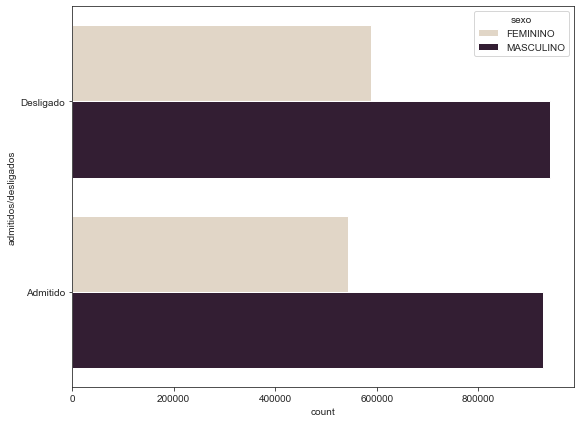

In [48]:
ax = plt.subplots(figsize=(9, 7))
sns.countplot(y="admitidos/desligados", hue="sexo", data=df, palette="ch:.25")

# Tópico 4 

In [49]:
df.groupby(by='sexo')['idade'].mean()

sexo
FEMININO     31.459629
MASCULINO    32.757209
Name: idade, dtype: float64

In [50]:
df.groupby(by='sexo')['salario'].mean()

sexo
FEMININO       2823.339600
MASCULINO    176148.015625
Name: salario, dtype: float32

In [51]:
df.groupby(by='sexo')['salario'].max()

sexo
FEMININO     5.657960e+07
MASCULINO    3.200002e+11
Name: salario, dtype: float32

In [52]:
df['sexo'].value_counts()

MASCULINO    1869145
FEMININO     1130830
Name: sexo, dtype: int64

<Figure size 720x360 with 0 Axes>

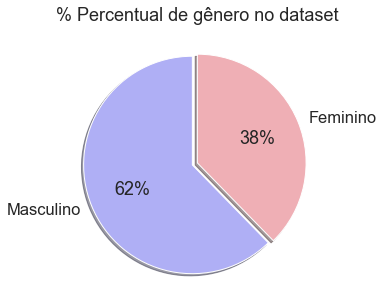

In [53]:
fig = plt.figure(figsize=(10, 5))
male_only = df[df['sexo'] == 'MASCULINO']
female_only = df[df['sexo'] == 'FEMININO']


fig = plt.figure(figsize=(5, 5))

colors = ['#AFAFF5', '#EFAFB5']
labels = ['Masculino', 'Feminino']
sizes = [len(male_only), len(female_only)]
explode = (0.05, 0)
sns.set(font_scale=1.5)
ax = plt.pie(sizes, labels=labels, explode=explode, colors=colors, shadow=True, startangle=90, autopct='%1.f%%')

plt.title('% Percentual de gênero no dataset')
plt.show()

## Média salarial por raça/cor

In [54]:
df.groupby(by='racacor')['salario'].mean()

racacor
AMARELA               5030.566406
BRANCA                4599.518555
INDIGENA              2235.812012
NAO IDENTIFICADO      1615.937256
NÃO INFORMADA       589722.187500
PARDA                 3521.045898
PRETA                 9875.421875
Name: salario, dtype: float32

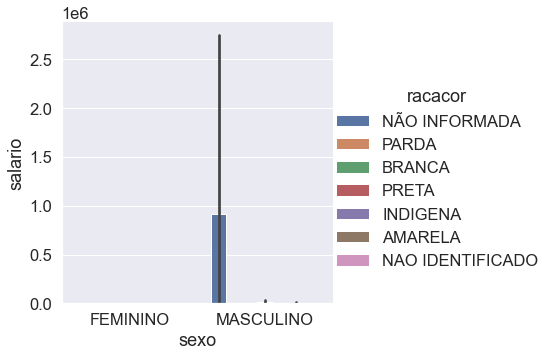

In [55]:
sns.catplot(x="sexo", y="salario", hue="racacor", kind="bar", data=df)

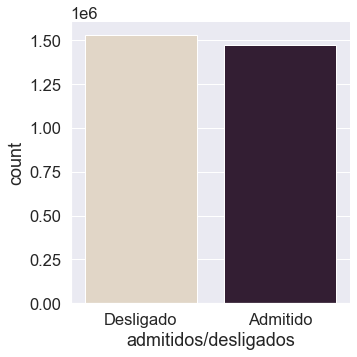

In [56]:
sns.catplot(x="admitidos/desligados", kind="count", palette="ch:.25", data=df)

In [57]:
df['tipomovimentacao'].value_counts()

Admissão por Reemprego                              1371438
Desligamento por Demissão sem Justa Causa            874772
Desligamento a Pedido                                350933
Término contrato trabalho prazo determinado          238471
Admissão por Primeiro Emprego                         92916
Desligamento por Demissão com Justa Causa             18593
Desliamento por Acordo Empregado e Empregador         16785
Desligamento por Término de Contrato                  12220
Não Identificado                                       6905
Desligamento por morte                                 6854
Admissão por contrato trabalho prazo determinado       4539
Culpa Recíproca                                        2317
Admissão por Reintegraçao                              1764
Desligamento por Aposentadoria                         1386
Desligamento de Tipo Ignorado                            82
Name: tipomovimentacao, dtype: int64

In [58]:
df[df['admitidos/desligados'] == 'Desligado']['tipomovimentacao'].value_counts()

Desligamento por Demissão sem Justa Causa        874772
Desligamento a Pedido                            350933
Término contrato trabalho prazo determinado      238471
Desligamento por Demissão com Justa Causa         18593
Desliamento por Acordo Empregado e Empregador     16785
Desligamento por Término de Contrato              12220
Não Identificado                                   6905
Desligamento por morte                             6854
Culpa Recíproca                                    2317
Desligamento por Aposentadoria                     1386
Desligamento de Tipo Ignorado                        82
Name: tipomovimentacao, dtype: int64

<AxesSubplot:xlabel='count', ylabel='tipomovimentacao'>

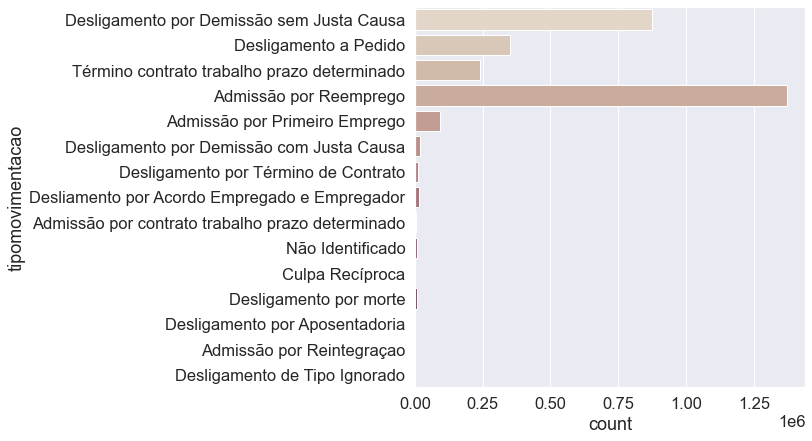

In [59]:
ax = plt.subplots(figsize=(7, 7))
sns.countplot(y="tipomovimentacao", data=df, palette="ch:.25")

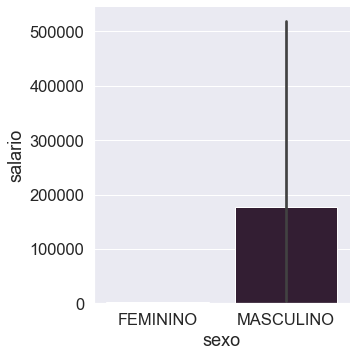

In [60]:
sns.catplot(x="sexo", y="salario",  palette="ch:.25",kind="bar", data=df)

In [61]:
df.groupby(by=['sexo','admitidos/desligados'])['salario'].mean()

sexo       admitidos/desligados
FEMININO   Admitido                  2124.296631
           Desligado                 3468.796875
MASCULINO  Admitido                347544.312500
           Desligado                 7226.244629
Name: salario, dtype: float32

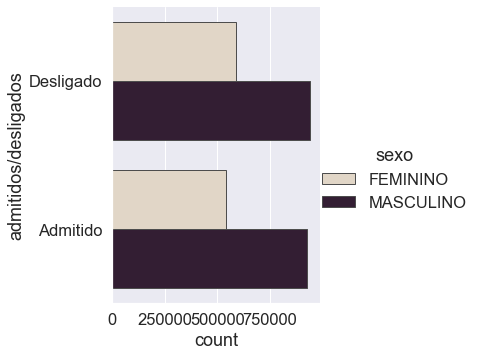

In [62]:
sns.catplot(y="admitidos/desligados", hue="sexo", kind="count",
            palette="ch:.25", edgecolor=".3",
            data=df)

##  Diferença salarial entre homens e mulheres admitidos e demitidos

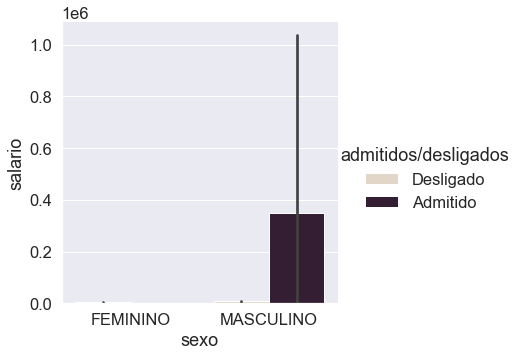

In [63]:
sns.catplot(x="sexo",palette="ch:.25", y="salario", hue="admitidos/desligados", kind="bar", data=df)

In [64]:
# Tópico 5 

In [65]:
df.groupby(by='sexo')['tipomovimentacao'].value_counts()

sexo       tipomovimentacao                                
FEMININO   Admissão por Reemprego                              500069
           Desligamento por Demissão sem Justa Causa           328517
           Desligamento a Pedido                               145644
           Término contrato trabalho prazo determinado          91664
           Admissão por Primeiro Emprego                        39625
           Desliamento por Acordo Empregado e Empregador         5884
           Desligamento por Demissão com Justa Causa             5683
           Desligamento por Término de Contrato                  5254
           Não Identificado                                      2293
           Admissão por contrato trabalho prazo determinado      2121
           Desligamento por morte                                1556
           Admissão por Reintegraçao                             1065
           Culpa Recíproca                                        860
           Desligamento por Ap

In [66]:
MOTIVO= {
'Admissão por Primeiro Emprego':'Admissão por Primeiro Emprego',
'Admissão por Reemprego':'Admissão por Reemprego', 
'Admissão por contrato trabalho prazo determinado':'Admissão por contrato trabalho prazo determinado',
'Desligamento por Demissão sem Justa Causa':'Desligamento por Demissão sem Justa Causa', 
'Desligamento por Demissão com Justa Causa':'Desligamento por Demissão com Justa Causa', 
'Culpa Recíproca':'Culpa Recíproca',
'Admissão por Reintegraçao':'Admissão por Reintegraçao', 
'Desligamento a Pedido':'Desligamento a Pedido',
'Término contrato trabalho prazo determinado':'Término contrato trabalho prazo determinado',
'Desligamento por Término de Contrato':'Desligamento por Término de Contrato',
'Desligamento por Aposentadoria':'Desligamento por Aposentadoria', 
'Desligamento por morte':'Desligamento por morte',
'Admissão por Transferência':'Admissão por Transferência', 
'Desligamento por Transferência':'Desligamento por Transferência', 
'Desliamento por Acordo Empregado e Empregador':'Desliamento por Acordo Empregado e Empregador',
'Desligamento de Tipo Ignorado':'Desligamento de Tipo Ignorado',
'Não Identificado':'Não Identificado'}

In [108]:
df['tipomovimentacao']= df['tipomovimentacao'].map(MOTIVO)

In [133]:
lista =[]
for x,y in MOTIVO.items():
    totalmotivo = (df[df['tipomovimentacao']==x])['sexo'].count()
    porcentagemmotivo = ((totalmotivo/total)*100).astype(int)
    lista.append(('Porcentagem dos motivos por gênero: ' + str(y) +': ' + str(porcentagemmotivo)+'%'))
cont=0
lista.sort()
for motivo in lista:
    print(lista[cont])
    cont= cont + 1

Porcentagem dos motivos por gênero: Admissão por Primeiro Emprego: 3%
Porcentagem dos motivos por gênero: Admissão por Reemprego: 45%
Porcentagem dos motivos por gênero: Admissão por Reintegraçao: 0%
Porcentagem dos motivos por gênero: Admissão por Transferência: 0%
Porcentagem dos motivos por gênero: Admissão por contrato trabalho prazo determinado: 0%
Porcentagem dos motivos por gênero: Culpa Recíproca: 0%
Porcentagem dos motivos por gênero: Desliamento por Acordo Empregado e Empregador: 0%
Porcentagem dos motivos por gênero: Desligamento a Pedido: 11%
Porcentagem dos motivos por gênero: Desligamento de Tipo Ignorado: 0%
Porcentagem dos motivos por gênero: Desligamento por Aposentadoria: 0%
Porcentagem dos motivos por gênero: Desligamento por Demissão com Justa Causa: 0%
Porcentagem dos motivos por gênero: Desligamento por Demissão sem Justa Causa: 29%
Porcentagem dos motivos por gênero: Desligamento por Transferência: 0%
Porcentagem dos motivos por gênero: Desligamento por Término d

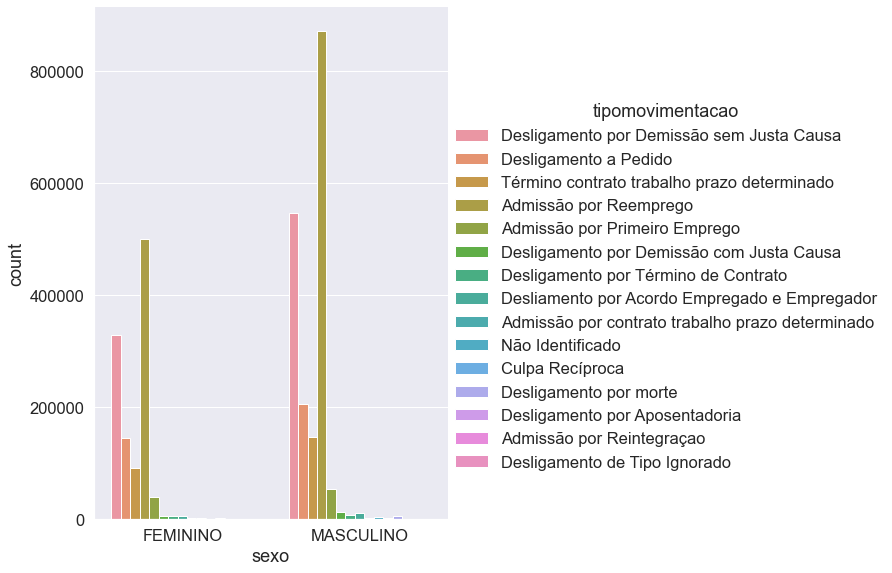

In [152]:
sns.catplot(x="sexo",hue="tipomovimentacao", kind="count",height=8, aspect=0.9, data=df)

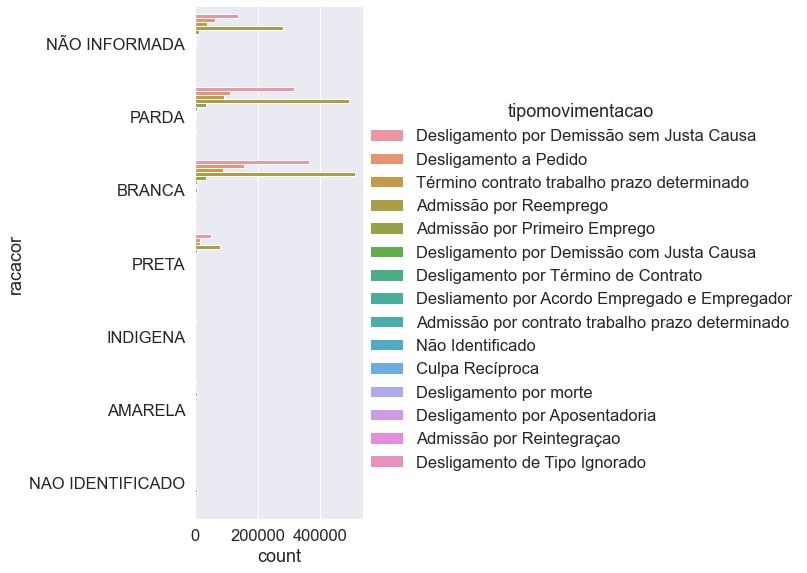

In [153]:
sns.catplot(y="racacor",hue="tipomovimentacao", kind="count",height=8, aspect=0.9, data=df)

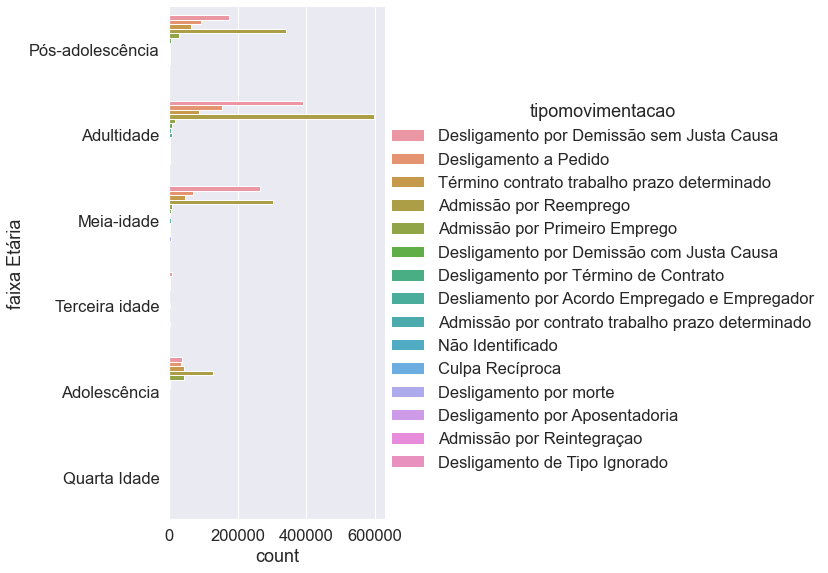

In [154]:
sns.catplot(y="faixa Etária",hue="tipomovimentacao", kind="count",height=8, aspect=0.9, data=df)